<a href="https://colab.research.google.com/github/prithvikannan/ubs-tech-workshops/blob/master/UBS_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1: API Exploration


## Background


*What is an API?*

API stands for "application programming interface". It's basically how any app can communicate to another app. 






*Example: Uber app*

Think about Uber's app as an example. All of the data about nearby drivers, routing, or pricing is not stored on your phone - it's being stored in Uber's servers (think "cloud"). 

When you select "shared uber from UCLA Rieber hall to Santa Monica pier" the app needs to find...


*   which drivers are nearby?
*   which route should you take?
*   which riders can you carpool with?
*   how much should it cost?
*   etc.

These are done via Uber's private APIs, but they may also have some public APIs that you and I can use.



*This seems like stuff for CS majors...why should I care about this?*

A lot of data is available online via a "download to excel" button but there is so much more out there that is not. Excel downloads are fixed, but APIs are more dynamic and can give the latest data. It's also much easier for companies to publish an API that you can use to get data. 

We are going to explore Johns Hopkins COVID dataset via an API (found [here](https://covid-api.com/)), rather than an excel download.




## Postman


*What is Postman?*

[Postman](https://www.postman.com/) is a tool for API testing which lets you save and make queries, export responses, etc, all in an easy to use UI.



Import [this collection](https://documenter.getpostman.com/view/10724784/SzYXWz3x?version=latest) into Postman. If you don't already have Postman installed, follow the steps for installing on Windows/Mac. 

We are going to use Postman to get familiar with these APIs

# PART 2: Python Code with APIs

Now we have seen all of the stuff we can do in Postman with these API - but how would we do this if we had to code it?

## Imports


We need to install Twilio's packages. These are not part of Python by default, so we need to use `pip`, which is a python package installer. We cannot use `import` here since `twilio` is not part of python (Twilio is a company that has made its own python package)

In [0]:
! pip install twilio

The following are necessary libraries for our code and are part of Python

`requests` is a library for API calls. You can find more information about requests [here](https://realpython.com/python-requests/)

`json` is a library for handing JSON file types. If you want to learn more about JSON files, click [here](https://www.w3schools.com/js/js_json_intro.asp). 


In [0]:
import requests
import json
from twilio.rest import Client

## COVID Data

In the URL, we have the source that we will get data from, as well as parameters we have specified, such as California, USA. We can get this URL from Postman directly or we can write it ourself

In [0]:
url = "https://covid-api.com/api/reports?date=2020-05-03&q=California&iso=USA&region_name=US&region_province=California"

payload = {}
headers= {}


We use the requests function to fetch data using the above URL. Since the data comes in byte form (not human readable), we must convert it to JSON form.

In [0]:
raw_response = requests.request("GET", url, headers=headers, data = payload)

print(raw_response)

This output is not very useful since it's not in a human readable form (it's still in binary). We can use `.json()` to convert to JSON format.

In [0]:
response = raw_response.json()

## this line prints response in a hierarchical format for readability
print(json.dumps(response, indent=4))

You can see how the JSON fromat is nicely idented to show a hierarchy.

We can select parts of the huge response using the "keys", which are the tags on the right side of the colon and are in quotes. In this case, we can select all of the counties for which we have data for.

In [0]:
all_counties = response['data'][0]['region']['cities']

print(json.dumps(all_counties, indent=4))


Let's choose a county that we want to find information for. I'm going to use Santa Clara. We are also going to make a variable to store the number of cases, which we can set to 0 for now.

In [0]:
# make variables my_county and num_cases here

Since `all_counties` is an array, we need to loop through it to find the entry with the county we want. Once we reach our county, we want to save the number of cases in that county in `num_cases`.

In [0]:
# loop through counties
  # if this county is the county you are looking for
    # set this county's confirmed cases to num_cases

print(num_cases)

## Text messaging

Now you have to sign up for a Twilio account. You can do this [here](https://www.twilio.com/sms/api). You will need an email and phone number. Using the free account you can only send texts to yourself, but for very cheap (a few cents) you can send texts to anyone.


Select "Get a Trial Number". This will be the number where you will be able to send text messages from. It will be in the form of +1xxxxxxxxx rather than (xxx)-xxx-xxx as you may be used to. 

Here's what my account dashboard looks like. Yours should look similar.

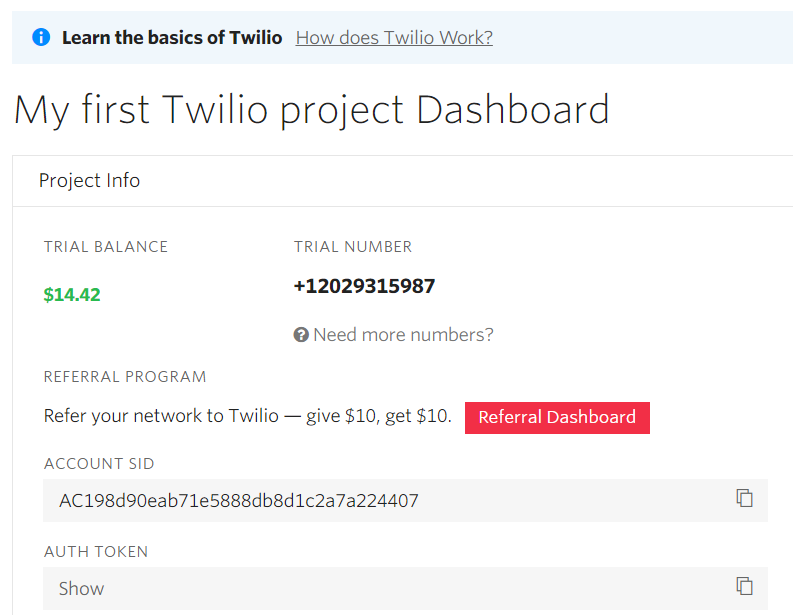

From the dashboard, copy the `account_sid`, `auth_token`, and `trial_number` into variables to be used later




In [0]:
account_sid = # your account sid
auth_token = # your token
trial_number = # your trial number

Let's send a test text to yourself. Twilio's website contains some helpful examples - here's one

First we will creates a "client" which we can use to send texts. Since python does not know anything about my Twilio account (I haven't written my username or password in the code) I have to give some other information about my account. In this case, we use the `account_sid` and `auth_token`.

In [0]:
client = Client(account_sid, auth_token)

Now we can send a message using the *function* `client.messages.create`. This function takes in 3 parameters:

*    `body`: the message text we want to send
*    `from`: the phone number we would like to send from (if you are using a paid Twilio account you can have multiple numbers). Since we are using the free version, we have to use the `trial_number`
*    `to`: the phone number we would like to send to

The function *returns* a code to indicate that it really sent the text.

In [0]:
my_number = # put your phone number her in the format +1xxxxxxxxx
test_message = client.messages.create(
                              body='Hi there!',
                              from_=trial_number,
                              to=my_number
                          )

print(test_message.sid)

Did you get the text? It should say "Sent from you Twilio trial account - Hi There!". The phone number will be the trial number that Twilio gave you.



## Putting it all together



Remember we already have variables `my_county` and `num_cases`

In [0]:
print(my_county)
print(num_cases)

Now let's try to compose a message using those variables


In [0]:
my_text = # write a message here
print (my_text)

Let's try to replace the body from the text with the string we just made.

In [0]:
message = client.messages.create(
                              body=my_text,
                              from_=trial_number,
                              to=my_number
                          )

print(message.sid)

And now you should have got a text "Sent from you Twilio trial account - " followed by whatever message you wanted to send.